
<left>
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</left>

# *Data Science - PPGOLD*


---






# Aula 06 - Validation

Tempo estimado: **60** minutos

## Objetivos

Após completar este AULA, você será capaz de:

* Separar os dados em Treino e Teste
* Usar as várias formas de separação

In [16]:
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 7)

import seaborn as sns

- Da Sklearn, importei o módulo DATASETS, para poder carregar os dados de amostra, e também o linear_model, para poder executar a regressão linear
- Da Sklearn, sub-biblioteca model_selection, eu importei o train_test_split para poder dividir os dados em treinamento e teste


In [17]:
# Load the Diabetes dataset
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn

columns = "age sex bmi bp tc ldl hdl tch ltg glu".split() # Declare the columns names

df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame

y = diabetes.target # define the target variable (dependent variable) as y

print(y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [18]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [30]:
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


# Cross Validation

## Random Split

Exemplos da referência [1]

In [20]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state = 10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [21]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

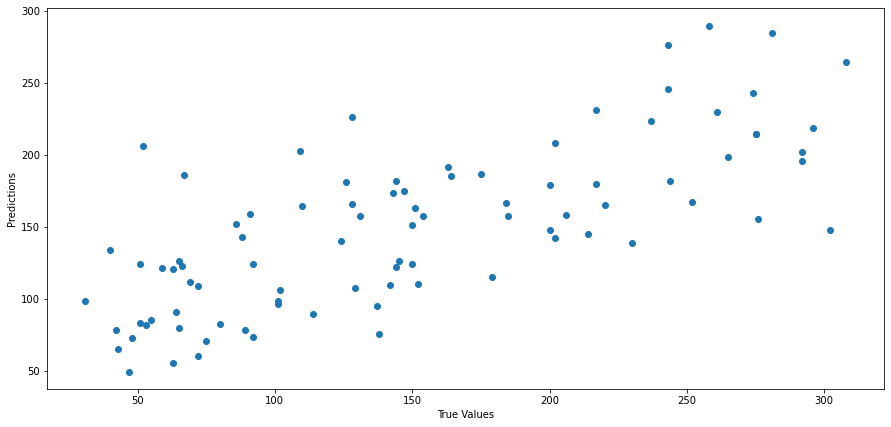

In [22]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [23]:
print("Score:", model.score(X_test, y_test))

Score: 0.5341962544929233


## K-Folds Cross Validation

In [31]:
#from sklearn.model_selection import KFold # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

splits = 6
scores = cross_val_score(model, df, y, cv=splits)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


Text(0, 0.5, 'Predictions')

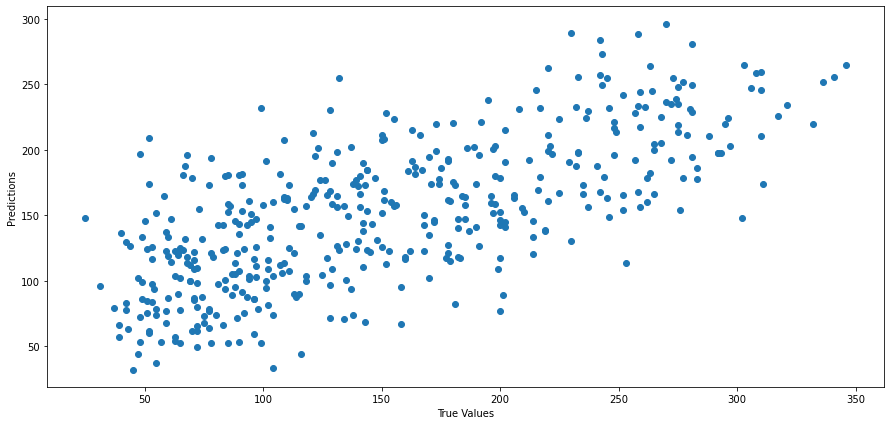

In [25]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=splits)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [26]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.49360634594761155


Splits: 2  Accuracy: 0.4953824380289852
Splits: 3  Accuracy: 0.48950770404311716
Splits: 4  Accuracy: 0.5004949801267402
Splits: 5  Accuracy: 0.49532382463572844
Splits: 6  Accuracy: 0.4908065838640775
Splits: 7  Accuracy: 0.49269769754902226
Splits: 8  Accuracy: 0.4921056046382969
Splits: 9  Accuracy: 0.4944502699427642
Splits: 10  Accuracy: 0.494251180618835
Splits: 11  Accuracy: 0.49631561636805677
Splits: 12  Accuracy: 0.49341948787135526
Splits: 13  Accuracy: 0.4896532118607002
Splits: 14  Accuracy: 0.49640279369664697
Splits: 15  Accuracy: 0.4927933975019788


Text(0, 0.5, 'Accuracy')

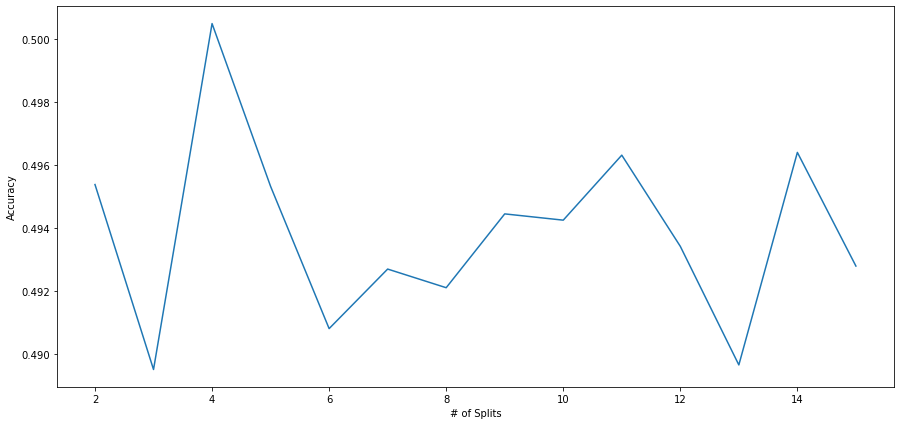

In [27]:
models_best = pd.DataFrame(columns=["Splits", "Accuracy"])

for s in range(2,splits):
    predictions = cross_val_predict(model, df, y, cv=s)
    accuracy = metrics.r2_score(y, predictions)
    print("Splits:", s, " Accuracy:", accuracy)
    models_best.loc[s-2] = [s, accuracy]

models_best.head()
plt.plot(models_best["Splits"] ,models_best["Accuracy"])
plt.xlabel("# of Splits")
plt.ylabel("Accuracy")


## Leave ONE out

 Accuracy: 0.4937935079824348


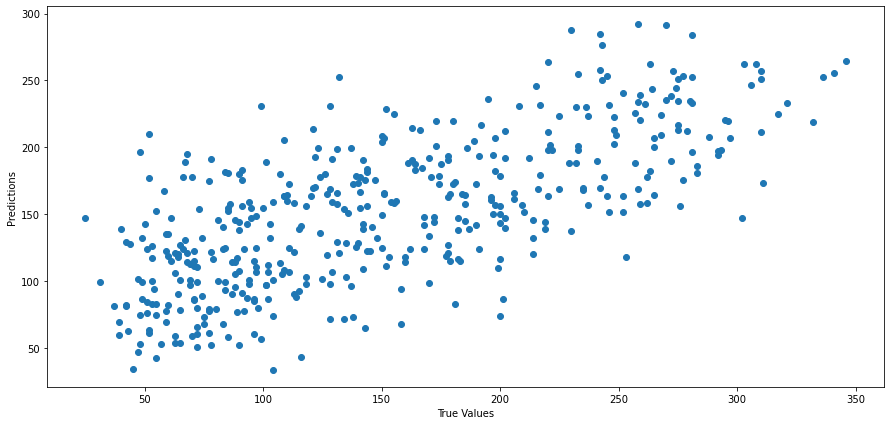

In [28]:
from sklearn.model_selection import LeaveOneOut 

loo = LeaveOneOut()

predictions = cross_val_predict(model, df, y, cv=loo)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

accuracy = metrics.r2_score(y, predictions)
print(" Accuracy:", accuracy)


# References

[1] https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

[2] https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

[3] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html?highlight=cross_val_predict

[5] https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

[6] https://jakevdp.github.io/PythonDataScienceHandbook/index.html

[7] http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html


## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-27  | 0.9  | <a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pécora</a> |  Initial development |

<hr>